# Support Vector Regression (SVR)

Linear SVR:-
e(epselon) insensitive tube:
imagine a tube of width epselon [measured vertically, not wrt to axis of tube but x-axis] , drawn on the scattered data-points, points outside these tubes are
c/a support vectors - ei(si) [if above this tube] & ei*(si-star) [if below this tube].
These support vectors dictate the positioning of this tube using one complex formula, which basically 
minimises the distances b/w the support vectors & tube.
The points inside the tube are ignored as they are bounded inside our margin of error [which is e(epselon)] 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

# result shows a 2-D array

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

# result shows a 1-D array

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


To apply feature scaling, we use StandardScaler class, which expects input as a vertical 2-D array, therefore, we need to reshape y into a vertical 2-D array.

In [5]:
y = y.reshape(len(y),1)

# arguments of reshape are 'no. of rows','no.of columns'

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

Why perform feature scaling for SVR? bcoz SVR doesn't have an explicit equation with coeff's to compensate for the scaling. 
So, use Feature Scaling when there is an implicit(indirect) relation b/w features & dependent variable and no explicit(direct) equation is available.

So, we need to apply feature scaling for our current dataset - 'level' & 'salary', so that some higher values don't dominate in our model and values in 'level' col which is from 1 to 10 has significance as compared to 'salary' which has from 45k to 1000k
Without feature scaling, our SVR won't work at all.

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# why 2 different scalars created for X & y? bcoz for X, scalar will be created based on values in X
# which in our case is 'level' col with values 1 to 10, however, we can't use that same scalar for 
# 'salary' col which has values ranging from 45k to 1000k
# And scalar is basically computing mean & std of the values and then scaling the column, so cant do same

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

why we did not split the data? bcoz the dataset we have is too small & only of 10 observations,

hence it's better to just train the model on the whole dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

# there are different kernels for support vector machine for different use-cases [check google]
# the most widely used is 'rbf' or 'radial basis function' kernel

c:\users\farha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

To predict a single result, as usual we'll use the predict func. however since we've scaled our X & y, we need to scale our input value as well with the same scalar used for X. From which we'll get a result of 'y' which will be as per the scale of y,
so we need to reverse scale that value to get a normal value, for our understanding.

In [15]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

# regressor.predict('scaled value of 6.5 2D array')
# inverse scaled value of the result obtained from above line using the inverse_transform() function
# however the result obtained from regressor.predict is in 1-D array, so we need to convert it to 2D
# reshape(-1,1) means -1 rows i.e. function will just use the total no. of rows by itself & 1 col

array([[170370.0204065]])

## Visualising the SVR results

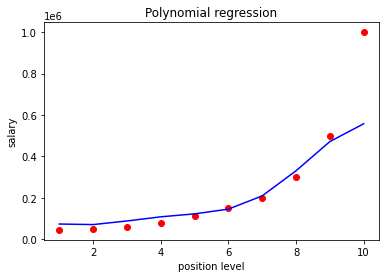

In [17]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title('Support Vector regression')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

# we need to plot the actual values, not the scaled values, so reverse scale the values where needed
# regressor.predict(X) gives the scaled value of y; however no need to reverse scale X in this predict()
# as regressor is fitted with the scaled values of X & y, not the actual values.

SVR is a good performer for both linear or non-linear since it has several different kernels to choose from for both type of datasets.
Also, SVR can't cut well with the outliers.

## Visualising the SVR results (for higher resolution and smoother curve)

In [ ]:
# to make the curve smoother and better resolution, code is present in the original ipynb of this folder
# the approach is to basically have a density of points with just 0.1 gap line 0.1,0.2,0.3 & so on.